# Final Capstone Project Question For my "Professional Certificate in Python Data Science": Can a model be made to predict highest complaint type?

#### warning this dataset may vary from time to time, and this work was done on nvidia graphics chip, may experience problems on cpu with large dataset

### importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### reading csv

In [25]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status')

# Question 4.

## preprocessing

### making complanint_type binary

In [33]:
df=df.replace(to_replace=['APPLIANCE', 'DOOR/WINDOW', 'SAFETY', 'ELECTRIC', 'FLOORING/STAIRS',
                              'GENERAL', 'PLUMBING', 'PAINT/PLASTER',
                              'UNSANITARY CONDITION', 'OUTSIDE BUILDING', 'WATER LEAK',
                              'ELEVATOR', 'HPD Literature Request', 'AGENCY', 'VACANT APARTMENT',
                              'GENERAL CONSTRUCTION', 'NONCONST', 'PAINT - PLASTER',
                              'CONSTRUCTION', 'STRUCTURAL','General','Unsanitary Condition','Safety', 'Electric',
                         'Appliance', 'Outside Building', 'Plumbing', 'Mold'],value=0,inplace=False) 

In [51]:
df['created_date'].unique()

array([ 1, 12, 11, 10,  9,  8,  7,  6,  5,  4,  2,  3], dtype=int64)

In [29]:
df=df.replace(to_replace='HEATING',value=1,inplace=False)

In [30]:
df=df.replace(to_replace='HEAT/HOT WATER',value=1,inplace=False)

# state of complaints

## changing neccesary columns into numercal once

In [37]:
df['closed_date'] = pd.to_datetime(df['closed_date'])

In [38]:
df['created_date'] = pd.to_datetime(df['created_date'],format='%Y/%m/%d')

In [39]:
df['created_date']=df['created_date'].apply(lambda x: x.month)

In [40]:
df['closed_date']=df['closed_date'].apply(lambda x: x.month)

In [41]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,1,45360449,1,11216.0,1197 DEAN STREET,DEAN STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.676861,-73.949426,NaN,RESIDENTIAL BUILDING,Open
1,1,45361263,1,11233.0,242 BAINBRIDGE STREET,BAINBRIDGE STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.681397,-73.927257,NaN,RESIDENTIAL BUILDING,Open
2,1,45360264,1,11226.0,20 CROOKE AVENUE,CROOKE AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.651999,-73.964560,NaN,RESIDENTIAL BUILDING,Open
3,1,45362101,0,11420.0,111-47 116 STREET,116 STREET,ADDRESS,South Ozone Park,The following complaint conditions are still o...,QUEENS,40.679495,-73.823720,NaN,RESIDENTIAL BUILDING,Open
4,1,45359292,1,10452.0,903 SUMMIT AVENUE,SUMMIT AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.830950,-73.931487,1.0,RESIDENTIAL BUILDING,Closed


In [65]:
dd=pd.get_dummies(df['borough'])

KeyError: 'borough'

### merge the features and drop NAN values

In [62]:
df = pd.concat([df[['closed_date','created_date', 'latitude', 'longitude']],dd,df[['complaint_type']]],axis=1)

In [63]:
df = df.dropna(axis=0)
df.columns

Index(['closed_date', 'created_date', 'latitude', 'longitude', 'created_date',
       'closed_date', 'address_type_ADDRESS', 'borough_BRONX',
       'borough_BROOKLYN', 'borough_MANHATTAN', 'borough_QUEENS',
       'borough_STATEN ISLAND', 'borough_Unspecified', 'complaint_type'],
      dtype='object')

### scale features

In [15]:
from sklearn.preprocessing import normalize

In [16]:
#df1 = normalize(df[['closed_date', 'created_date', 'latitude', 'longitude']])

In [17]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(sd, sd['complaint_type'], test_size=0.20, random_state=42,shuffle=True)

In [19]:
from sklearn.linear_model import LogisticRegression


## prediction with linear model

In [86]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ld= LDA()

In [20]:
model = LogisticRegression(multi_class='ovr')

In [79]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred1 = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    738358
           1       1.00      1.00      1.00    419103

    accuracy                           1.00   1157461
   macro avg       1.00      1.00      1.00   1157461
weighted avg       1.00      1.00      1.00   1157461

Confusion matrix, without normalization
[[419103      0]
 [     0 738358]]


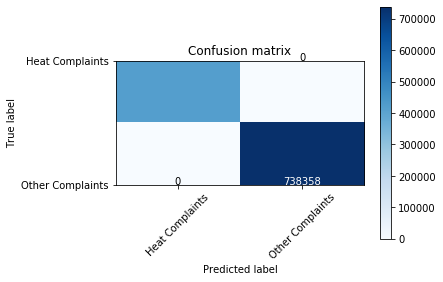

In [83]:
confusion_matrix(y_test,pred1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred1, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heat Complaints','Other Complaints'],normalize= False,  title='Confusion matrix')

## prediction with linear Discretor

In [87]:
ld.fit(X_train,y_train)
predld=ld.predict(X_test)

C:\Users\aimaz\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      1.00      0.78    738358
           1       0.00      0.00      0.00    419103

    accuracy                           0.64   1157461
   macro avg       0.32      0.50      0.39   1157461
weighted avg       0.41      0.64      0.50   1157461

Confusion matrix, without normalization
[[     0 419103]
 [     0 738358]]


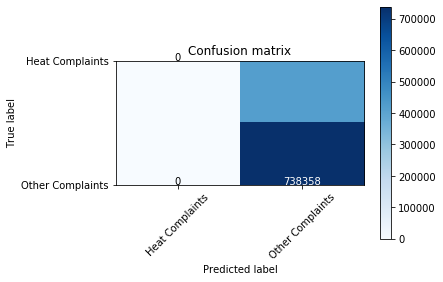

In [116]:
confusion_matrix(y_test,predld)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predld, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, predld))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heat Complaints','Other Complaints'],normalize= False,  title='Confusion matrix')

## prediction with randomforestclassifier

In [89]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [93]:
model1= rfc(n_estimators =10)

In [94]:
model1.fit(X_train,y_train)
predrfc=model1.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    738358
           1       1.00      1.00      1.00    419103

    accuracy                           1.00   1157461
   macro avg       1.00      1.00      1.00   1157461
weighted avg       1.00      1.00      1.00   1157461

Confusion matrix, without normalization
[[419103      0]
 [     0 738358]]


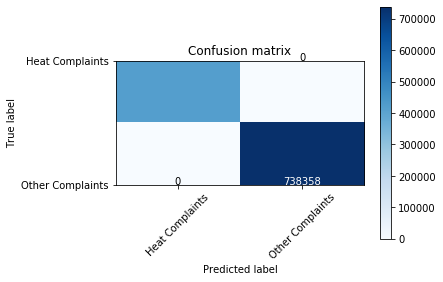

In [117]:
#confusion_matrix(y_test,predrfc)
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predrfc, labels=[1,0])
np.set_printoptions(precision=2)


print (classification_report(y_test, predrfc))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heat Complaints','Other Complaints'],normalize= False,  title='Confusion matrix')

## prediction with xgboost using what was learnt 

In [96]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [97]:
dtrain = xgb.DMatrix(X_train,label=y_train)

C:\Users\aimaz\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [98]:
param = {'max_depth': 5, 'eta': 1, 'silent': 1, 'objective': 'binary:logistic', 'eval_metric':'auc'}

bst = xgb.train(param,dtrain,10)

In [99]:
dtest= xgb.DMatrix(X_test)

In [ ]:
pred2=bst.predict(dtest)

In [112]:
pred2.mean()

0.36209202

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    738358
           1       1.00      1.00      1.00    419103

    accuracy                           1.00   1157461
   macro avg       1.00      1.00      1.00   1157461
weighted avg       1.00      1.00      1.00   1157461

Confusion matrix, without normalization
[[419103      0]
 [     0 738358]]


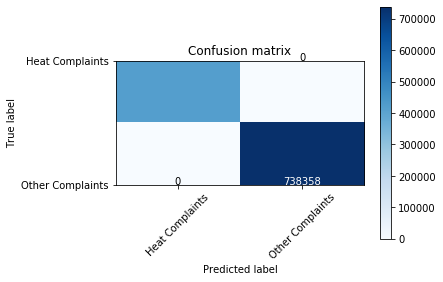

In [104]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, pred2>0.9, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, pred2>0.9))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Heat Complaints','Other Complaints'],normalize= False,  title='Confusion matrix')

## Our LogisticRegressor, RandomForestClassifier, and XGBoostClassifier were able to classify our test sample with 100% probability. We also know this was no misstake trying to group the features by LDA brought no positive results.

##